# Start for Random forest in a grid

In [24]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv("glassTrain.csv",  index_col=0)    
df_test = pd.read_csv("glassTest.csv",  index_col=0)    

## Using the best features given by mlxtend feature selection

In [4]:
mlx_df = df[ ['RI', 'Na', 'Mg', 'Si', 'K', 'Ba', 'Fe', 'type'] ]
mlx_test_df = df_test[['RI', 'Na', 'Mg', 'Si', 'K', 'Ba', 'Fe'] ]

X_test = mlx_test_df.values
X = mlx_df.iloc[:, :-1 ].values
y = mlx_df.iloc[:, -1: ].values.flatten()

In [5]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [6]:
rf_pipe = make_pipeline( RandomForestClassifier( n_estimators=500
                             , max_depth= 100
                            , n_jobs=-1))

In [7]:
rf_pipe.fit(X,y)

Pipeline(memory=None,
         steps=[('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=100,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=500, n_jobs=-1,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

## Use Random forest pipeline with grid

In [26]:
depth_range = { 'randomforestclassifier__max_depth' :[5, 10, 15, 25, 50, 100] }

gs = GridSearchCV(estimator=rf_pipe, 
                  param_grid=depth_range, 
                  scoring='f1_macro', 
                  cv=6,
                  n_jobs=-1,
                 iid= True)

gs = gs.fit(X, y)

In [27]:
print(gs.best_score_)
print(gs.best_params_)

0.6202102286525855
{'randomforestclassifier__max_depth': 15}


In [28]:
y_pred_test =  gs.predict(X_test).astype(int)
output = pd.DataFrame( y_pred_test)
output['Id'] = output.index
output=output.rename(columns={ 0: "label"})
output.to_csv("submission_test_gsrf_f1_macro.csv", index=False)

In [29]:
# import sklearn
# sorted(sklearn.metrics.SCORERS.keys())

## Random forest with nested CV

In [30]:
from sklearn.model_selection import cross_val_score
depth_range = { 'randomforestclassifier__max_depth' :[5, 10, 15, 25, 50, 100] }


gs = GridSearchCV(estimator=rf_pipe, 
                  param_grid=depth_range, 
                  scoring='accuracy', 
                  cv=3,
                  n_jobs=-1,
                 iid= True)



scores = cross_val_score(gs, X, y, scoring='accuracy', cv=3)
scores

array([0.65306122, 0.625     , 0.60869565])

In [31]:
gs.fit(X,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('randomforestclassifier',
                                        RandomForestClassifier(bootstrap=True,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=100,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=1,
                                                               min_samples_split=2,
    

In [32]:
y_pred = gs.predict(X)
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y, y_pred=y_pred, labels=[1, 2, 3, 5, 6, 7] )
print(confmat)

[[46  1  0  0  0  0]
 [ 3 48  0  0  0  0]
 [ 4  6  1  0  0  0]
 [ 0  0  0  9  0  0]
 [ 0  0  0  0  6  0]
 [ 1  0  0  0  0 18]]


In [33]:
df.type.value_counts()

2    51
1    47
7    19
3    11
5     9
6     6
Name: type, dtype: int64

## Plot confusion matrix

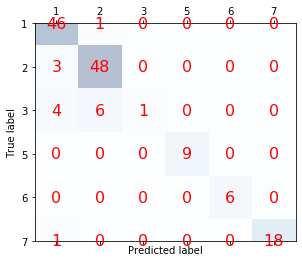

In [35]:
fig, ax = plt.subplots()
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
labels=[ 1, 2, 3, 5, 6, 7] 
for i, ii in enumerate(labels):
    for j, jj in enumerate(labels):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center', fontsize=16, color='red')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.xticks(ticks=[0,1,2,3,4,5] , labels=labels )
plt.yticks(ticks=[0,1,2,3,4,5] , labels=labels )
plt.show()

# Start of SVC

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_cross, y_train, y_cross = train_test_split(X, y , test_size=0.3, stratify=y, random_state=1)

In [37]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [38]:
# make pipeline
pipe_svc = make_pipeline(StandardScaler(), SVC(kernel='rbf',random_state=1))

# Define ranges of parameter values:
param_range  = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0] # For regularization parameter C.
param_range2 = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]         # For scaling parameter gamma og rbf-kernel.

param_grid   = [ {'svc__C': param_range, 'svc__gamma': param_range2  }  ]
             
gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=6,
                  n_jobs=-1)

gs = gs.fit(X, y)
print(gs.best_score_)
print(gs.best_params_)

0.7062937062937062
{'svc__C': 100.0, 'svc__gamma': 0.01}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [39]:
scores = gs.cv_results_['mean_test_score'].reshape(len(param_range),len(param_range2))

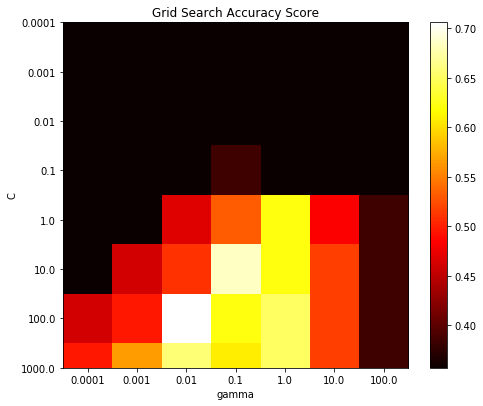

In [40]:
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('gamma') # 1/(softness of decision boundary), i.e. small = soft
plt.ylabel('C')     # 1/(size of support vector margin), i.e. large = tight margin
plt.colorbar()
plt.xticks(np.arange(len(param_range2)), param_range2)
plt.yticks(np.arange(len(param_range)), param_range)
plt.title('Grid Search Accuracy Score')
plt.show()

## Fine Tune gamma and C

In [41]:
# make pipeline
pipe_svc = make_pipeline(StandardScaler(), SVC(kernel='rbf',random_state=1))

# Define ranges of parameter values:
param_range  = [10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0] # For regularization parameter C.
param_range2 = [0.01,0.002,0.003, 0.004,0.005,0.006, 0.007,0.008,0.009, 0.1] # For scaling parameter gamma og rbf-kernel.

param_grid   = [ {'svc__C': param_range, 'svc__gamma': param_range2  }  ]

             
gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=6,
                  n_jobs=-1)

gs = gs.fit(X, y)
print(gs.best_score_)
print(gs.best_params_)

0.7062937062937062
{'svc__C': 90.0, 'svc__gamma': 0.01}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [42]:
scores = gs.cv_results_['mean_test_score'].reshape(len(param_range),len(param_range2))

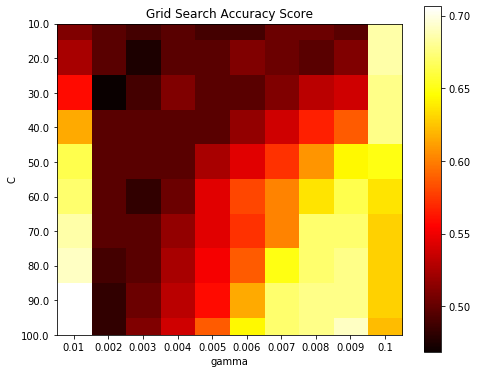

In [43]:
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('gamma') # 1/(softness of decision boundary), i.e. small = soft
plt.ylabel('C')     # 1/(size of support vector margin), i.e. large = tight margin
plt.colorbar()
plt.xticks(np.arange(len(param_range2)), param_range2)
plt.yticks(np.arange(len(param_range)), param_range)
plt.title('Grid Search Accuracy Score')
plt.show()

##  Nested Cross Validation

In [44]:
from sklearn.model_selection import cross_val_score

pipe_svc = make_pipeline(StandardScaler(), SVC(kernel='rbf',random_state=1))
param_range  = [10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0] # For regularization parameter C.
param_range2 = [0.01,0.002,0.003, 0.004,0.005,0.006, 0.007,0.008,0.009, 0.1] # For scaling parameter gamma og rbf-kernel.

inner_segments = 3
outer_segments = 5
n_models = inner_segments*outer_segments*len(param_grid)
gs = GridSearchCV(estimator  = pipe_svc,
                  param_grid = param_grid,
                  scoring    = 'accuracy',
                  iid        = 'True', # Parameter to be removed (weight score by size of segment)
                  cv         = inner_segments)


scores = cross_val_score(gs, X, y, 
                         scoring='accuracy', cv=outer_segments)

print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))

CV accuracy: 0.651 +/- 0.089


In [45]:
gs.fit(X,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svc',
                                        SVC(C=1.0, cache_size=200,
                                            class_weight=None, coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='auto_deprecated',
                                            kernel='rbf', max_iter=-1,
                                            probability=False, random_state=1,
                                            shrinking=True, tol=0.001,
                                            verbose=False))],
           

In [46]:
y_pred_test =  gs.predict(X_test).astype(int)

output = pd.DataFrame( y_pred_test)
output.to_csv("submission_test_gs.csv")

## Confusion Matrix

In [48]:
y_pred = gs.predict(X)
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y, y_pred=y_pred, labels=[1, 2, 3, 5, 6, 7] )
print(confmat)

[[44  3  0  0  0  0]
 [ 9 42  0  0  0  0]
 [ 3  7  1  0  0  0]
 [ 0  0  0  9  0  0]
 [ 0  0  0  0  6  0]
 [ 1  0  0  0  0 18]]


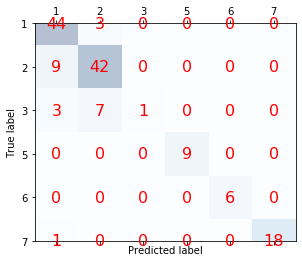

In [49]:
fig, ax = plt.subplots()
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
labels=[ 1, 2, 3, 5, 6, 7] 
for i, ii in enumerate(labels):
    for j, jj in enumerate(labels):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center', fontsize=16, color='red')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.xticks(ticks=[0,1,2,3,4,5] , labels=labels )
plt.yticks(ticks=[0,1,2,3,4,5] , labels=labels )
plt.show()

# Start of KPCA pipe

In [50]:
df = pd.read_csv("glassTrain.csv",  index_col=0)    
df_test = pd.read_csv("glassTest.csv",  index_col=0)    

In [51]:
X_test = df_test.values
X = df.iloc[:, :-1 ].values
y = df.iloc[:, -1: ].values.flatten()

In [52]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import KernelPCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [53]:
X_train, X_cross, y_train, y_cross = train_test_split( X, y , test_size=0.3, stratify=y, random_state=0)

# make pipeline
pipe_kpca = make_pipeline(StandardScaler(),  KernelPCA(degree=5), LogisticRegression(solver='lbfgs',multi_class='auto') )

In [54]:
pipe_kpca.fit(X,y)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kernelpca',
                 KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=5,
                           eigen_solver='auto', fit_inverse_transform=False,
                           gamma=None, kernel='linear', kernel_params=None,
                           max_iter=None, n_components=None, n_jobs=None,
                           random_state=None, remove_zero_eig=False, tol=0)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbo

In [55]:
# Define ranges of parameter values:
# gamma_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]  # For scaling parameter gamma og rbf-kernel.
C_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
solver_range = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']

param_grid   = [ {'logisticregression__C': C_range, 'logisticregression__solver': solver_range  }  ]
            
gs = GridSearchCV(estimator=pipe_kpca, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=6,
                  n_jobs=-1)

In [56]:
gs = gs.fit(X, y)
print(gs.best_score_)
print(gs.best_params_)

0.5944055944055944
{'logisticregression__C': 100.0, 'logisticregression__solver': 'newton-cg'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [57]:
y_test =  gs.predict(X_test).astype(int)
output = pd.DataFrame( y_test)
output.to_csv("submission_test_gs_lr.csv")

## Confusion matrix

In [58]:
y_pred = gs.predict(X)
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y, y_pred=y_pred, labels=[1, 2, 3, 5, 6, 7] )
print(confmat)

[[37 10  0  0  0  0]
 [11 35  4  1  0  0]
 [ 2  3  6  0  0  0]
 [ 0  1  0  8  0  0]
 [ 0  0  0  0  6  0]
 [ 0  0  0  0  0 19]]


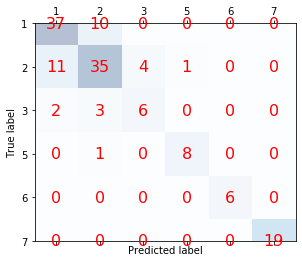

In [59]:
fig, ax = plt.subplots()
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
labels=[ 1, 2, 3, 5, 6, 7] 
for i, ii in enumerate(labels):
    for j, jj in enumerate(labels):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center', fontsize=16, color='red')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.xticks(ticks=[0,1,2,3,4,5] , labels=labels )
plt.yticks(ticks=[0,1,2,3,4,5] , labels=labels )
plt.show()